<a href="https://colab.research.google.com/github/sahaaj/Graduate-Rotational-Internship-Program/blob/master/GRIP_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task - 3
### To Explore Unsupervised Machine Learning

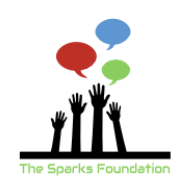

# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# Loading the dataset from the datasets library

In [2]:
data=datasets.load_iris()
dataset=pd.DataFrame(data.data,columns=data.feature_names)
targets = data.target
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
X=dataset.iloc[:,:].values

# Finding the Optimum number of clusters using the elbow method
As we don't know how many clusters are optimal for the given dataset we will have to find an optimal value of K, we will do this by using the elbow method

In [4]:
history=[]
for i in range(1,12):
  km=KMeans(n_clusters=i,random_state=0)
  km.fit(X)
  history.append(km.inertia_)
  y_pred=km.predict(X)

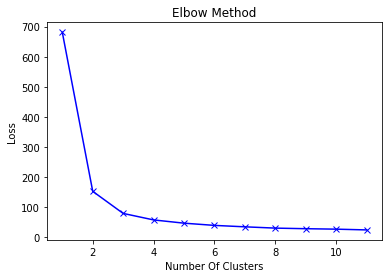

In [5]:
plt.plot(range(1,12),history,'-bx')
plt.xlabel('Number Of Clusters')
plt.ylabel('Loss')
plt.title('Elbow Method')
plt.show()

**We choose the optimum number of clusters as 3 according to the elbow method becuase we are seeing that there is not a very significant decrease in the loss after we increase the number of clusters further.**

In [6]:
km=KMeans(n_clusters=3,random_state=0,max_iter=300)
km.fit(X)
Y_pred=km.predict(X)

***We have 4 columns in the datasets which are used for classifying the flowers into a particular category, But for visualization purpose we can't plot all the 4 dimensions on a single graph. So here we are plotting the Sepal length VS the Sepal width and then using the color attribute to specify the class of that particular object.***

# Plotting using the classes predicted by our KMeans Classifier

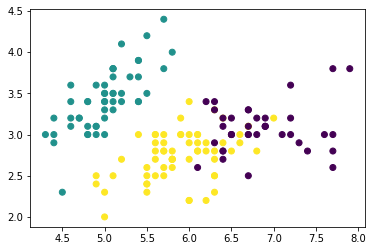

In [7]:
len=dataset.iloc[:,0]
wid=dataset.iloc[:,1]
plt.scatter(len,wid,c=Y_pred)

# Classes based on the Targets Specified in the dataset

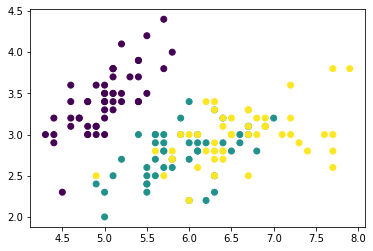

In [8]:
plt.scatter(len,wid,c=targets)

***We infer that the graphs are quite similar in terms of grouping the similar kind of flowers. So we can infer from this that our classifier is doing a good job in predicting the category of the flower from using the 4 inputs given to it which contain the information about the flower.***

**We also see the model is finding it difficult to differentiate between the second and the third categories because when we are plotting them they do look quite overlapped, so our model did get confused between the second and the third categories of the flowers in the given dataset**